In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
#read csv
crop=pd.read_csv('/content/Crop_recommendation.csv')

In [21]:
crop.tail()
#here we cann see the bottom 5 rows of the dataset

,N,P,K,temperature,humidity,ph,rainfall,label
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee
2199,104,18,30,23.603016,60.396475,6.779833,140.937041,coffee


In [20]:
crop.head()
#here we cann see the top 5 rows of the dataset

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


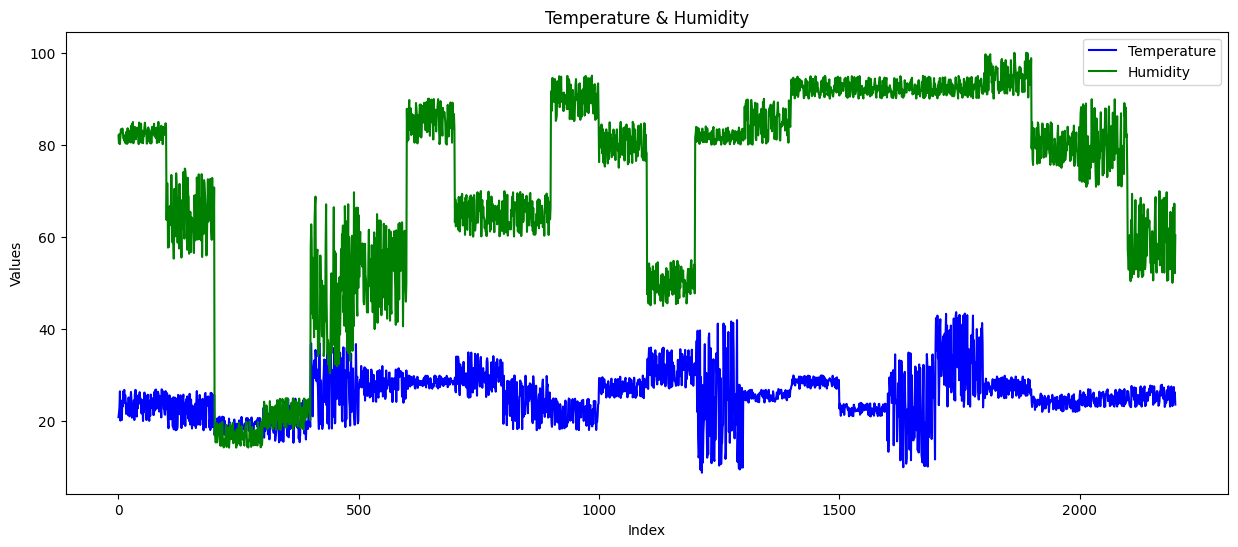

In [31]:
plt.figure(figsize=(15, 6))
plt.plot(crop.index, crop['temperature'],label='Temperature',color='blue')
plt.plot(crop.index, crop['humidity'],label='Humidity', color='green')
plt.title('Temperature & Humidity')
plt.xlabel('Index')
plt.ylabel('Values')
plt.legend()
plt.show()

In [7]:
crop.shape
#the it shows the rows and column count

(2200, 8)

In [8]:
crop.info()
#its information about the dataset like data types, non-null counts

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [9]:
crop.isnull()
#it is used for geting if the ros contain the empty slots (or) missing values

,N,P,K,temperature,humidity,ph,rainfall,label
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
2195,False,False,False,False,False,False,False,False
2196,False,False,False,False,False,False,False,False
2197,False,False,False,False,False,False,False,False
2198,False,False,False,False,False,False,False,False


In [13]:
crop.isnull().sum()
#this is count of the empty values for each
#its useful for filling the empty the element slots since the empty slots create bias and oversimplify complex patterns in the dataset.

,0
N,0
P,0
K,0
temperature,0
humidity,0
ph,0
rainfall,0
label,0


In [12]:
crop.duplicated().sum()
#its for checking for duplicate rows

0

In [14]:
crop.describe()
#descriptive statistics of the dataset

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


In [15]:
crop['temperature'].value_counts()
#value counts for the temperature column

,count
temperature,
20.879744,1
29.480699,1
29.943492,1
28.033065,1
29.884305,1
...,...
25.365861,1
28.568406,1
30.284966,1


In [16]:
crop['label'].value_counts()
#the label column in the dataset represents the target output that the model will predict

,count
label,
rice,100
maize,100
jute,100
cotton,100
coconut,100
papaya,100
orange,100
apple,100
muskmelon,100


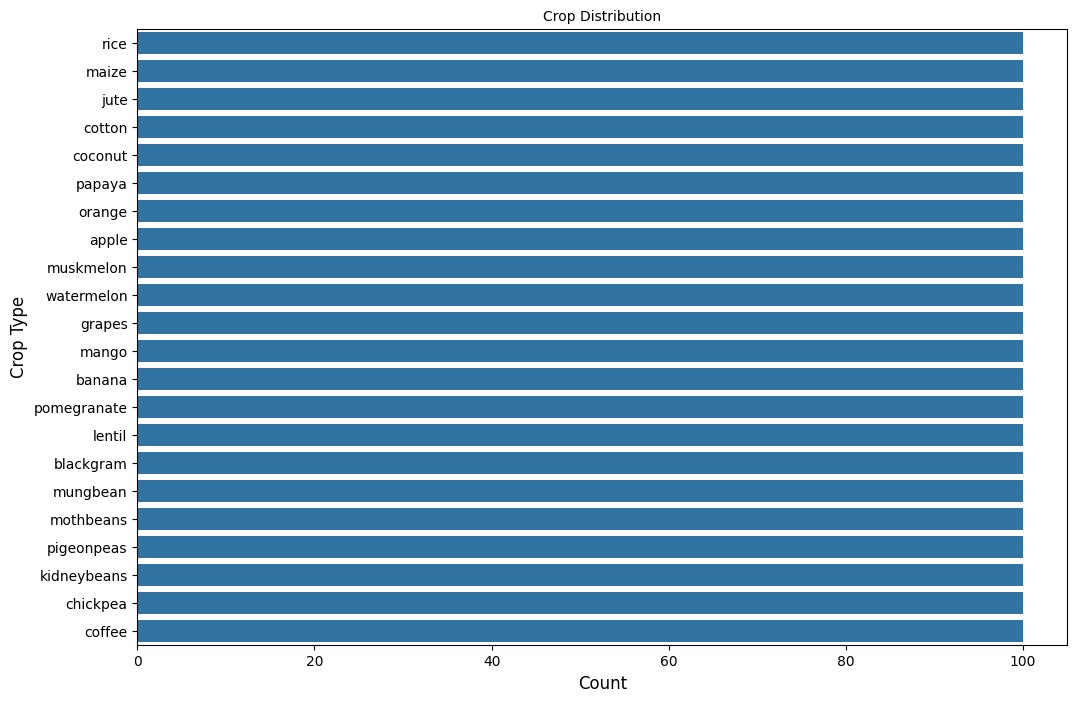

In [17]:
plt.figure(figsize=(12, 8))
sns.countplot(y=crop['label'],order=crop['label'].value_counts().index)
plt.title('Crop Distribution',fontsize=10)
plt.xlabel('Count', fontsize=12)
plt.ylabel('Crop Type', fontsize=12)
plt.show()

<h1>To see the distribution of different crop types in the dataset. we used count plot for easy visualization.Each crop type is evenly distributed, with 100 entries for each</h1>

<ipython-input-18-26af3e22f51b>:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x='temperature',y='humidity',data=crop, palette='deep')
<ipython-input-18-26af3e22f51b>:6: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Crop Type',loc='upper left')


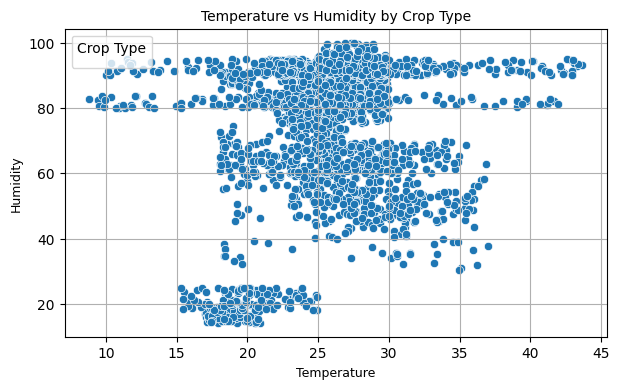

In [18]:
plt.figure(figsize=(7,4))
sns.scatterplot(x='temperature',y='humidity',data=crop, palette='deep')
plt.title('Temperature vs Humidity by Crop Type',fontsize=10)
plt.xlabel('Temperature',fontsize=9)
plt.ylabel('Humidity',fontsize=9)
plt.legend(title='Crop Type',loc='upper left')
plt.grid(True)
plt.show()

<h1>To know what are the most optimal humidity scale we used scatter plot to observe the relationship between temperature and humidity for different crop types. we can see the patterns of dots on how crops perform to varying environmental conditions, each require certain environment to grow.<h1>

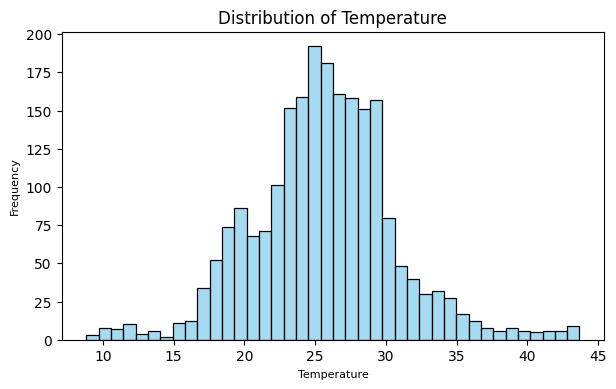

In [19]:
plt.figure(figsize=(7, 4))
sns.histplot(crop['temperature'], color='skyblue')
plt.title('Distribution of Temperature',fontsize=12)
plt.xlabel('Temperature', fontsize=8)
plt.ylabel('Frequency', fontsize=8)
plt.show()

<h1>To see the distribution of temperature values in the dataset, we used histogram with most values concentrated between 20 and 30 degrees.</h1>